<a href="https://colab.research.google.com/github/nev12/gaming-impact-analysis/blob/main/gaming_vs_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPLAROTARY ANALYSIS OF GAMING IMPACT ON WORK PERFORMANCE

## 1. Problem Statement

This analysis explores how daily gaming habits affect work or academic performance. Specifically, it aims to answer:
- Why does gaming negatively impact some individuals?
- Are certain types of games more likely to be associated with negative outcomes?
- How can gaming habits be adjusted to reduce negative impacts and promote a more balanced approach?

## 2. Data Loading

Using a 'Gamin Hours vs Academic & Work Performance' dataset from kaggle:
https://www.kaggle.com/datasets/prince7489/gaming-hours-vs-academic-and-work-performance

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

original_len = len(df)
df.head()

Saving Gaming_Hours_vs_Performance.csv to Gaming_Hours_vs_Performance.csv


,User_ID,Age,Gender,Occupation,Game_Type,Daily_Gaming_Hours,Weekly_Gaming_Hours,Primary_Gaming_Time,Sleep_Hours,Stress_Level,Focus_Level,Academic_or_Work_Score,Productivity_Level,Performance_Impact
0,U0001,21,Male,Working Professional,Action,4.0,28.0,Morning,4.6,6,4,69,66,Negative
1,U0002,35,Female,Student,Sports,1.0,7.0,Night,5.4,2,7,67,72,Neutral
2,U0003,26,Male,Student,Puzzle,2.0,14.0,Morning,8.0,4,8,82,82,Positive
3,U0004,32,Male,Working Professional,Action,1.0,7.0,Night,4.9,7,7,71,66,Neutral
4,U0005,19,Male,Working Professional,Action,2.1,14.7,Morning,7.0,7,7,67,63,Neutral


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 3. Cleaning the Data

First step is always cleaning the data. Even though this data is already pretty clean, it is always better to double check and make sure nothing gets through, so that data is easier to work with, and results are as correct as they can be.
After the inspection, the following were found:
1. duplicates
2. Misspelled 'Sports' as 'Sportss'
3. Values in columns 'Gender' and 'Primary_Gaming_Time' are eather all lower case or upper case
3. Rows with missing 'Performance_Impact' value, which makes it irrelevant



In [3]:
df = df.drop_duplicates()
print(f"Removed {original_len - len(df)} duplicate rows")

df["Game_Type"] = df["Game_Type"].replace({"Sportss": "Sports"})
df["Gender"] = df["Gender"].str.capitalize()
df["Primary_Gaming_Time"] = df["Primary_Gaming_Time"].str.capitalize()
df = df.dropna(subset=['Performance_Impact'])

Removed 9 duplicate rows


## 4. Exploratory Data Analysis

Now that the data is clean, it's all ready for uncoverring its patterns, relationships and key insight.


First, lets start by seeing the counts of all types of impacts:

In [89]:
pref_impact = df['Performance_Impact'].value_counts()

display(pref_impact)

,count
Performance_Impact,
Neutral,762
Negative,135
Positive,103


Let's take out all the means of all numeric parameters to see how they differ between type of impact:

In [5]:
impact_group = df.groupby("Performance_Impact")

print("Daily Gaming Hours mean: ", impact_group['Daily_Gaming_Hours'].mean(), "\n")
print("Weekly Gaming Hours mean: ", impact_group['Weekly_Gaming_Hours'].mean(), "\n")
print("Seelp Hours mean: ", impact_group['Sleep_Hours'].mean(), "\n")
print("Focus Level mean: ", impact_group['Focus_Level'].mean(), "\n")
print("Academic or Work Score mean: ", impact_group['Academic_or_Work_Score'].mean(), "\n")
print("Productivity Score mean: ", impact_group['Productivity_Level'].mean(), "\n")

Daily Gaming Hours mean:  Performance_Impact
Negative    5.058519
Neutral     3.284646
Positive    1.305825
Name: Daily_Gaming_Hours, dtype: float64 

Weekly Gaming Hours mean:  Performance_Impact
Negative    35.409630
Neutral     22.992520
Positive     9.140777
Name: Weekly_Gaming_Hours, dtype: float64 

Seelp Hours mean:  Performance_Impact
Negative    5.195556
Neutral     6.530971
Positive    7.781553
Name: Sleep_Hours, dtype: float64 

Focus Level mean:  Performance_Impact
Negative    6.200000
Neutral     6.056430
Positive    5.951456
Name: Focus_Level, dtype: float64 

Academic or Work Score mean:  Performance_Impact
Negative    75.866667
Neutral     74.837270
Positive    75.825243
Name: Academic_or_Work_Score, dtype: float64 

Productivity Score mean:  Performance_Impact
Negative    75.740741
Neutral     75.101050
Positive    75.951456
Name: Productivity_Level, dtype: float64 



From this output, we can conclude:

* The biggest difference is in the gaming hours, where neutrals
have 2-3 times more than positives, and negatives have 4x more on weekly basis.

* Sleep hours are affected by this, where negatives average with only 5h, and positives with 7h.

* Other parameters, like focus level, academic or work score and productivity score dont differ as much.

Next, let's check how the Game Types as well as Occupation of the people differ for each Performance Impact type. To better understand the data, lets take out percentages.

In [6]:
counts_game_type = pd.crosstab(df['Game_Type'], df['Performance_Impact'])
game_type_percentage = counts_game_type.div(counts_game_type.sum(axis=0), axis=1) * 100
game_type_percentage = game_type_percentage.round(1)
display(game_type_percentage)

Performance_Impact,Negative,Neutral,Positive
Game_Type,,,
Action,21.5,17.6,16.5
Casual,17.8,16.3,11.7
Puzzle,17.0,14.6,15.5
Simulation,19.3,19.2,19.4
Sports,15.6,16.0,17.5
Strategy,8.9,16.4,19.4


From this, we can see that two most **positive** game types are **strategy** and sports, but two with most negative impact are action and casual

In [7]:
counts_occupation = pd.crosstab(df['Occupation'], df['Performance_Impact'])
occupation_percentages = counts_occupation.div(counts_occupation.sum(axis=0), axis=1) * 100
occupation_percentages = occupation_percentages.round(1)

display(occupation_percentages)

Performance_Impact,Negative,Neutral,Positive
Occupation,,,
Student,48.9,53.0,52.4
Working Professional,51.1,47.0,47.6


Since strategy games appear to have a positive impact on people, lets have a closer look at them


In [36]:
df_strategy = df[df['Game_Type'] == 'Strategy']
df_strategy = df_strategy.drop(columns=['Occupation', "Weekly_Gaming_Hours", "Primary_Gaming_Time",
                                        "Stress_Level", "Focus_Level", "Academic_or_Work_Score",
                                        "Productivity_Level", "Game_Type"])

df_strategy['Daily_Gaming_Hours'] = ((df_strategy['Daily_Gaming_Hours']*2).round())/2

print(df_strategy)

     User_ID  Age  Gender  Daily_Gaming_Hours  Sleep_Hours Performance_Impact
8      U0009   32    Male                 1.0          8.2           Positive
12     U0013   21  Female                 3.0          6.3            Neutral
19     U0020   30  Female                 2.5          6.1            Neutral
21     U0022   31  Female                 1.0          8.5           Positive
22     U0023   27  Female                 5.5          5.2           Negative
...      ...  ...     ...                 ...          ...                ...
990    U0981   26    Male                 1.5          5.3            Neutral
996    U0986   32    Male                 2.5          6.6            Neutral
1002   U0992   35  Female                 5.0          7.2            Neutral
1005   U0995   31    Male                 5.0          7.9            Neutral
1010   U1000   19  Female                 4.5          7.7            Neutral

[157 rows x 6 columns]


In [37]:
strategy_hours = df_strategy['Daily_Gaming_Hours'].value_counts().sort_index()

display(strategy_hours)

,count
Daily_Gaming_Hours,
0.5,8
1.0,20
1.5,14
2.0,18
2.5,16
3.0,14
3.5,15
4.0,14
4.5,7


Lets also have a closer look at action games, since they were shown as most played by the negative side.


In [34]:
df_action = df[df['Game_Type'] == 'Action']
df_action = df_action.drop(columns=['Occupation', "Weekly_Gaming_Hours", "Primary_Gaming_Time",
                                        "Stress_Level", "Focus_Level", "Academic_or_Work_Score",
                                        "Productivity_Level", "Game_Type"])

df_action['Daily_Gaming_Hours'] = ((df_action['Daily_Gaming_Hours']*2).round())/2

print(df_action)

     User_ID  Age  Gender  Daily_Gaming_Hours  Sleep_Hours Performance_Impact
0      U0001   21    Male                 4.0          4.6           Negative
3      U0004   32    Male                 1.0          4.9            Neutral
4      U0005   19    Male                 2.0          7.0            Neutral
9      U0010   25    Male                 4.5          6.7            Neutral
11     U0012   35  Female                 3.5          8.4            Neutral
...      ...  ...     ...                 ...          ...                ...
991    U0982   24  Female                 2.0          4.8            Neutral
995    U0985   22  Female                 3.5          5.1            Neutral
1000   U0990   31  Female                 3.5          5.2            Neutral
1004   U0994   31    Male                 2.0          7.9           Positive
1008   U0998   18    Male                 1.0          4.6            Neutral

[180 rows x 6 columns]


In [35]:
action_hours = df_action['Daily_Gaming_Hours'].value_counts().sort_index()

display(action_hours)

,count
Daily_Gaming_Hours,
0.5,8
1.0,14
1.5,14
2.0,17
2.5,13
3.0,16
3.5,22
4.0,15
4.5,21


## 5. DATA VISUALIZATION

After exploring all the data, few things stood out, and would be worth visualizing

1. **Distribution of Performance Impact** - percentages of people based on the impact gaming has on them
2. **Daily gaming hours by impact group** - the amount of time spent gaming on daily basis in every impact category
3. **Game type preferences** - percentages of game types mostly played by positive and negative impact groups
4. **Action vs Strategy games** - comparison of the time spent playing action vs strategy games

Text(0.5, 1.0, 'Distribution of Performance Impact')

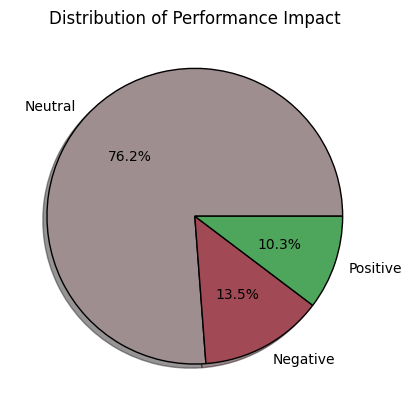

In [99]:
plt.pie(pref_impact, labels = pref_impact.index,
        autopct = '%1.1f%%',
        colors = ['#9e8e90', '#a14a55', '#4ea65c'],
        shadow = True, wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.title("Distribution of Performance Impact")


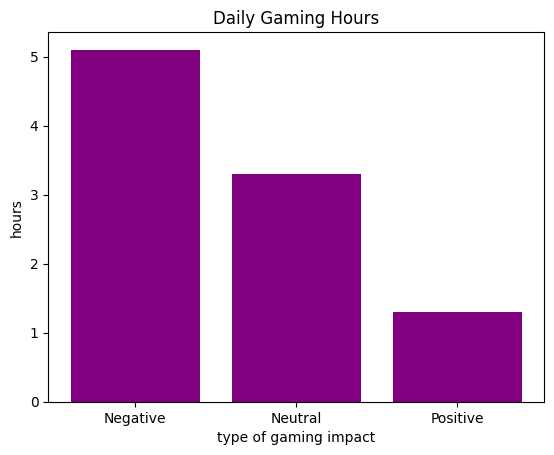

In [47]:
playing_hours = impact_group['Daily_Gaming_Hours'].mean().round(1)

plt.bar(playing_hours.index, playing_hours.values, color = 'purple')
plt.title("Daily Gaming Hours")
plt.xlabel("type of gaming impact")
plt.ylabel("hours")
plt.show()

In [64]:
types_positives = game_type_percentage['Positive']
types_negatives = game_type_percentage['Negative']

Text(0.5, 1.0, 'Negative Impact Group')

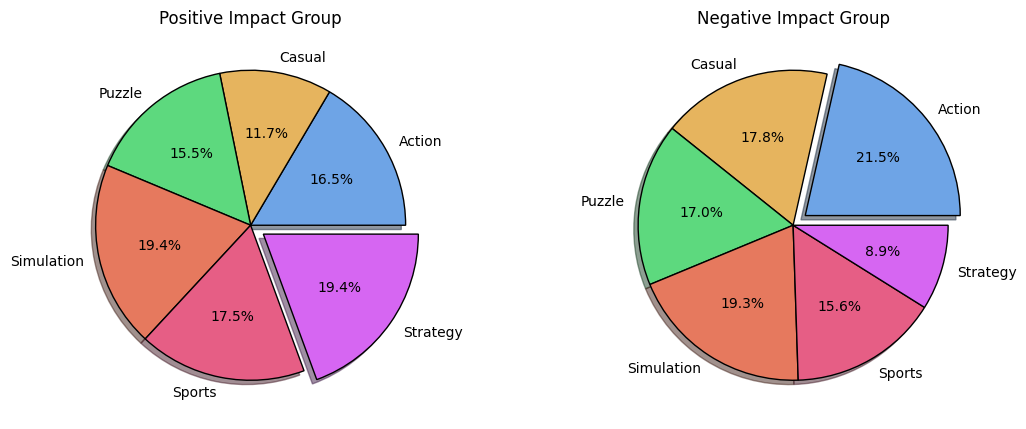

In [98]:
colors = np.array(["#6ea4e6", "#e6b45e", "#5dd97e", "#e6795e", "#e65e85", "#d666f2"])
figure, axes = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw = {'wspace': 0.4})

axes[0].pie(types_positives,
        labels=types_positives.index, autopct = '%1.1f%%',
        explode = [0, 0, 0, 0, 0, 0.1], shadow = True,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},
        colors = colors)
axes[0].set_title("Positive Impact Group")

axes[1].pie(types_negatives,
        labels=types_negatives.index, autopct = '%1.1f%%',
        explode = [0.1, 0, 0, 0, 0, 0], shadow = True,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},
        colors = colors)
axes[1].set_title("Negative Impact Group")

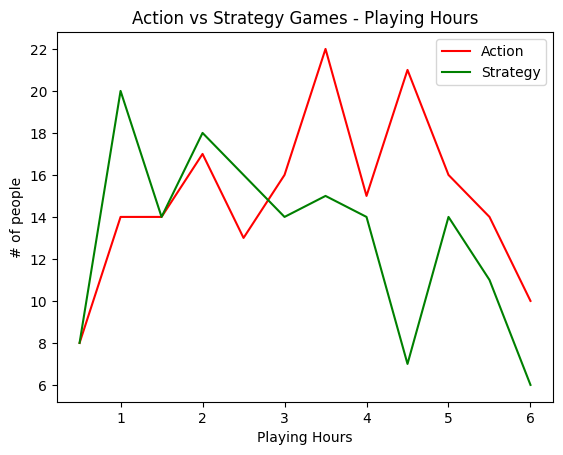

In [100]:
plt.plot(action_hours.index, action_hours.values, color = 'red', label = 'Action')
plt.plot(strategy_hours.index, strategy_hours.values, color = 'green', label = 'Strategy')
plt.title("Action vs Strategy Games - Playing Hours")
plt.xlabel("Playing Hours")
plt.ylabel("# of people")
plt.legend()

plt.show()



## 6. Insights and Conclusions

- **Performance Impact Distribution:** Most people stayed neutral, while there is not big of a difference between the amount of negative and positive impact groups.

- **Playing Hours:** After taking a closer look into each group, one parameter always stands out, and that is gaming hours. Negative group has even up to 4x more daily gaming hours than the positive group.

- **Game Type Preferences:** Types of games played by these groups differ, positive group mostly plays Strategy games, while the negative one usually prefers Action games. However, the main difference is again the time spent playing. Most people play Action games for longer than Strategy games. Since 16.5% of positive group still plays Action games, it shows that they are not necessarily bad.

- **Key Takeaway:** Gaming can have a positive impact if played in moderation. Excessive daily gaming, rather than the type of game, is the main factor associated with negative performance. Adjusting gaming habits to moderate levels can help reduce negative effects and promote a more balanced lifestyle.

![happy_gamer.jpg](https://static.vecteezy.com/system/resources/previews/012/155/699/non_2x/concept-pro-gamer-esport-very-happy-with-hands-up-cartoon-gamer-play-in-online-video-game-in-the-headphones-and-with-computer-mouse-and-keyboard-happy-to-win-vector.jpg)
